In [150]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
with open('publicspreadsheet.xlsx','rb') as fin:
    df = pd.read_excel(fin, 
                  names = ['lastname','firstname','age','race','sex','state',
                          'county','tags','wcd','lacr','yr_o','yr_c','yr_e',
                          'sentence','dna','star','fc','mwid','f/mfe','p/fa',
                          'om','ild','postdate','id'])

In [152]:
df.columns

Index(['lastname', 'firstname', 'age', 'race', 'sex', 'state', 'county',
       'tags', 'wcd', 'lacr', 'yr_o', 'yr_c', 'yr_e', 'sentence', 'dna',
       'star', 'fc', 'mwid', 'f/mfe', 'p/fa', 'om', 'ild', 'postdate', 'id'],
      dtype='object')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Data columns (total 24 columns):
lastname     2480 non-null object
firstname    2480 non-null object
age          2474 non-null float64
race         2480 non-null object
sex          2480 non-null object
state        2480 non-null object
county       2432 non-null object
tags         2220 non-null object
wcd          2480 non-null object
lacr         1008 non-null object
yr_o         2480 non-null int64
yr_c         2480 non-null int64
yr_e         2480 non-null int64
sentence     2480 non-null object
dna          494 non-null object
star         128 non-null object
fc           301 non-null object
mwid         704 non-null object
f/mfe        570 non-null object
p/fa         1448 non-null object
om           1333 non-null object
ild          639 non-null object
postdate     2480 non-null datetime64[ns]
id           2480 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(18)
memory usage: 465.

In [154]:
df.describe()

,age,yr_o,yr_c,yr_e,id
count,2474.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,28.747777,1995.532661,1997.230242,2008.133065,4291.731048
std,10.169661,11.020340,10.836262,8.266782,766.590378
min,11.000000,1955.000000,1956.000000,1989.000000,2977.000000
25%,21.000000,1987.000000,1989.000000,2002.000000,3614.750000
50%,26.000000,1995.000000,1997.000000,2010.000000,4304.500000
75%,35.000000,2005.000000,2006.000000,2015.000000,4963.250000
max,83.000000,2018.000000,2018.000000,2019.000000,5598.000000


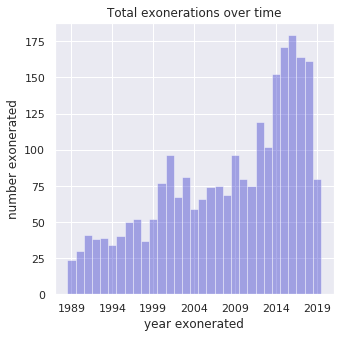

In [291]:
yrmin=df['yr_e'].min()
yrmax=df['yr_e'].max()

fig, ax = plt.subplots(figsize=(5,5))
#df['yr_e'].hist(ax=ax,bins=np.arange(yrmin-.5,yrmax+1), grid=False)
sns.distplot(df['yr_e'].values, bins=np.arange(yrmin-.5,yrmax+1), ax=ax,
             kde=False, color=(0.2,0.2,0.8));

ax.set_xlabel('year exonerated')
ax.set_ylabel('number exonerated')
ax.set_xticks(np.arange(yrmin,yrmax+1,step=5))
ax.set_title('Total exonerations over time')
plt.show()

#fig.savefig('test.png', bbox_inches='tight')

In [226]:
df_tcpc = pd.read_csv('tcpc.csv')
df_tcpc = df_tcpc[(df_tcpc['Year'] > 1988) & (df_tcpc['Year']<2017)][['Year','Total']]
df_tcpc = df_tcpc.set_index('Year')

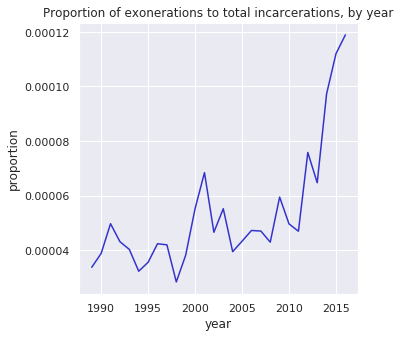

In [288]:
df_yr = df.groupby(by='yr_e')
ex_ct_tot = df_yr.count()['lastname'].loc[1989:2016]

props = ex_ct_tot.values / df_tcpc['Total'].values 


fig, ax = plt.subplots(figsize=(5,5))
#ax.plot(np.arange(1989,2017,1),props,c=(0.2,0.2,0.8))
sns.lineplot(np.arange(1989,2017,1),props, ax=ax,color=(0.2,0.2,0.8))
ax.set_xlabel('year')
ax.set_ylabel('proportion')
ax.set_title('Proportion of exonerations to total incarcerations, by year')
plt.show()

#fig.savefig('test.png', bbox_inches='tight')

In [156]:
df['dna']=df['dna'].map({'DNA':1, np.NaN:0})
df['star']=df['star'].map({'*':1, np.NaN:0})

In [157]:
prop_dna = np.sum((1-df['star']) * df['dna']) / len(df)
print('Prop. of exonerations resulting from DNA: {0} ({1:d}/{2})'.format(prop_dna, int(prop_dna*len(df)),len(df)))


Prop. of exonerations resulting from DNA: 0.14758064516129032 (366/2480)


In [158]:
df_dna=df[(df['dna']==1) & (df['star']==0)]

In [159]:
df_dna.describe()

,age,yr_o,yr_c,yr_e,dna,star,id
count,366.000000,366.000000,366.000000,366.000000,366.0,366.0,366.000000
mean,25.142077,1987.590164,1989.051913,2005.710383,1.0,0.0,3676.076503
std,6.941756,6.793334,7.008803,6.826078,0.0,0.0,593.005250
min,14.000000,1974.000000,1974.000000,1989.000000,1.0,0.0,2978.000000
25%,20.000000,1983.000000,1984.000000,2001.000000,1.0,0.0,3254.250000
50%,24.000000,1986.000000,1988.000000,2006.000000,1.0,0.0,3532.500000
75%,29.000000,1992.000000,1994.000000,2011.000000,1.0,0.0,3821.750000
max,53.000000,2008.000000,2009.000000,2019.000000,1.0,0.0,5592.000000


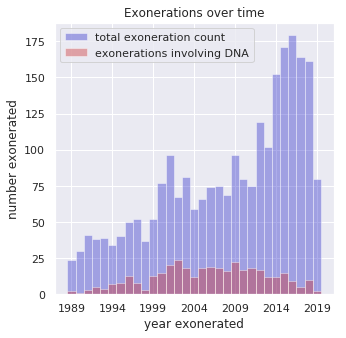

In [293]:
fig, ax = plt.subplots(figsize=(5,5))
#df['yr_e'].hist(ax=ax,bins=np.arange(yrmin-.5,yrmax+1), grid=False)
sns.distplot(df['yr_e'].values, bins=np.arange(yrmin-.5,yrmax+1), ax=ax,
             kde=False, color=(0.2,0.2,0.8),label='total exoneration count')

ax.set_xlabel('year exonerated')
ax.set_ylabel('number exonerated')
ax.set_xticks(np.arange(yrmin,yrmax+1,step=5))
ax.set_title('Exonerations over time')

sns.distplot(df_dna['yr_e'].values, bins=np.arange(yrmin-.5,yrmax+1),ax=ax,
            kde=False, color=(0.8,0.2,0.2), label='exonerations involving DNA')

#sns.distplot(df[df['race']=='Black']['yr_e'].values, bins=np.arange(yrmin-.5,yrmax+1),ax=ax,
#            kde=False, color=(0.8,0.2,0.2), label='DNA exonerations')
ax.legend()
plt.show()

#fig.savefig('test.png', bbox_inches='tight')

To be sure, let's look at the trend of proportions of exonerations involving DNA.

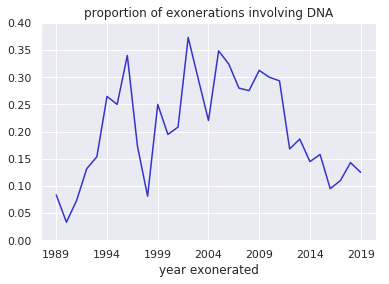

In [300]:
# use pd.cut to bin the data similar to the histogram
df['dna_ex'] = (1-df['star']) * df['dna']
df_yr = df.groupby(by='yr_e')

yr_ct_dna = df_yr.sum()['dna']
yr_ct_tot = df_yr.count()['lastname']

fig, ax = plt.subplots()
sns.lineplot(np.arange(1989,2020,1), yr_ct_dna / yr_ct_tot, 
                ax=ax, color=(0.2,0.2,0.8))

ax.set_xticks(np.arange(yrmin,yrmax+1,step=5))
ax.set_ylim(0,0.4)
ax.set_xlabel('year exonerated')
ax.set_title('proportion of exonerations involving DNA')
plt.show()

#fig.savefig('test.png', bbox_inches='tight')

# Incarceration time
Let's look at some other variables, such as incarceration time for exonerations.

In [301]:
df['inc_time'] = df['yr_e'] - df['yr_c']

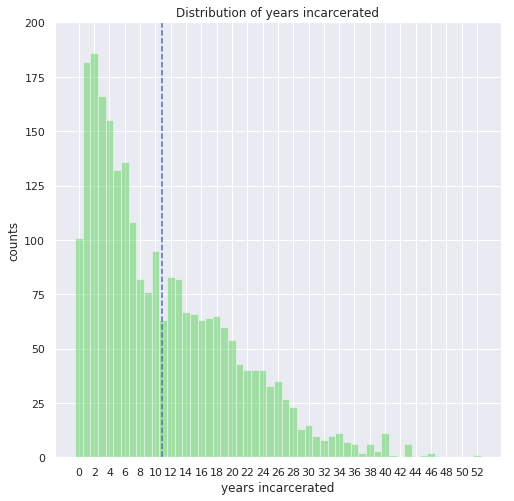

average inc time: 10.90282258064516


In [306]:
fig, ax = plt.subplots(figsize=(8,8))
#df['yr_e'].hist(ax=ax,bins=np.arange(yrmin-.5,yrmax+1), grid=False)
xmax = df['inc_time'].max()
xmin = df['inc_time'].min()
sns.distplot(df['inc_time'].values, ax=ax, bins=np.arange(xmin-.5,xmax+1),
             kde=False, color=(0.2,0.8,0.2),label='')
ax.set_xticks(np.arange(xmin,xmax+1,2))

ax.set_xlabel('years incarcerated')
ax.set_ylabel('counts')
ax.set_title('Distribution of years incarcerated')

inc_time_mean = df['inc_time'].mean()
ax.plot([inc_time_mean, inc_time_mean],[0,200],'--')
ax.set_ylim(0,200)

plt.show()

#fig.savefig('test.png', bbox_inches='tight')

print('average inc time: {0}'.format(inc_time_mean))

In [305]:
#def expdist(t,lamb): return( np.exp(-t/lamb)/lamb)

In [90]:
df['race'].unique()

array(['Black', 'White', 'Hispanic', 'Other', 'Asian', 'Native American'],
      dtype=object)

In [104]:
df_race = df.groupby(by='race')
list(df_race.groups.keys())

['Hispanic', 'Black', 'Asian', 'Other', 'Native American', 'White']

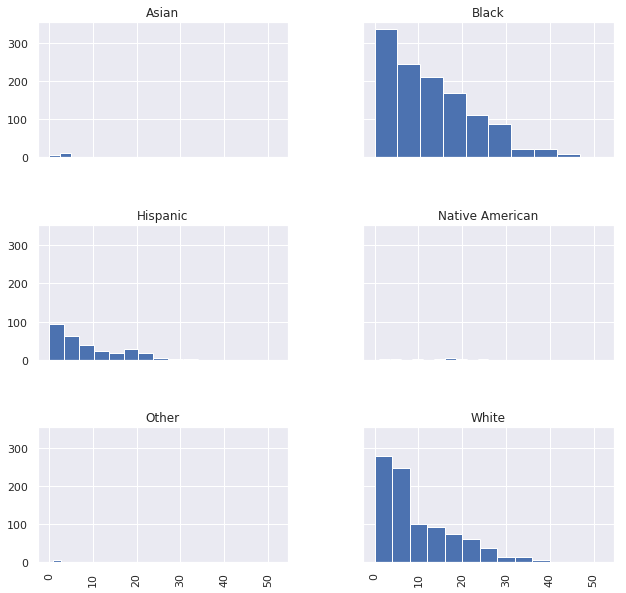

In [124]:
labels = list(df_race.groups.keys())
fig, ax = plt.subplots(figsize=(10,10))


df.hist(column='inc_time',by='race',
        sharey=True,sharex=True,
        ax = ax,
        density=False)
plt.show()

Looks like the trends are largely the same for the various groups. That is, the number of instances of a particular incarceration time decrease with the magnitude of the incarceration time. The differences in the plots seem to be a result of the absolute numbers of instances of the exonerations of the various races. One way to rectify this disparity is to normalize these histograms, i.e., convert them to probability distributions over incarceration times. That is, the plots will show the quantities
$$ P\left( T \, | \, \text{race} \right) $$
for different values of the $\text{race}$ variable.

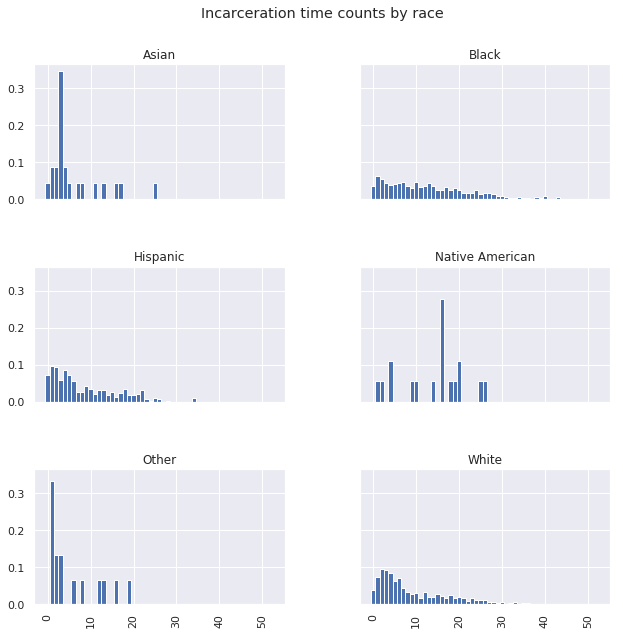

In [138]:
labels = list(df_race.groups.keys())
fig, ax = plt.subplots(figsize=(10,10))


df.hist(column='inc_time',by='race',
        sharey=True,sharex=True,
        ax = ax,
        density=True,
        bins=np.arange(xmin-.5,xmax+1))
plt.suptitle('Incarceration time counts by race')
plt.show()

We can look at one race close up. This is
$$ P\left(T \, | \, \text{White} \right) $$

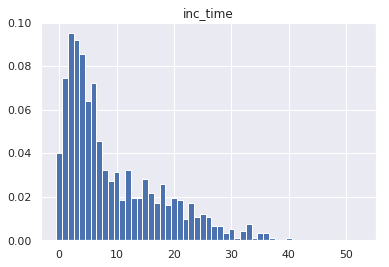

In [140]:
df_white = df[df['race']=='White']
df_white.hist('inc_time', density=True,bins=np.arange(xmin-.5,xmax+1))
plt.show()